<a href="https://colab.research.google.com/github/cawllol/NLP/blob/master/SpamTextClassificationSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('/content/spam.tsv',sep='\t')

In [9]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [10]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [11]:
len(df)

5572

In [12]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [13]:
#balancing dataset
ham=df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [14]:
spam=df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [15]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [16]:
ham=ham.sample(spam.shape[0])

In [17]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [18]:
data=ham.append(spam,ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


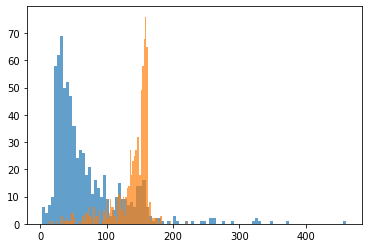

In [19]:
#EDA
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

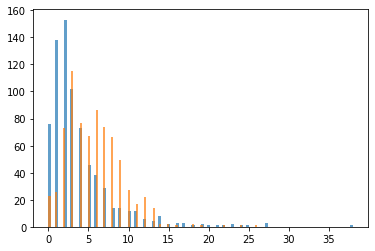

In [20]:
#plotting for punctuation
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

In [21]:
#Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
data.head()

,label,message,length,punct
0,ham,Jordan got voted out last nite!,31,1
1,ham,LOOK AT THE FUCKIN TIME. WHAT THE FUCK YOU THI...,54,1
2,ham,"By the way, 'rencontre' is to meet again. Moun...",60,8
3,ham,"Sure, whenever you show the fuck up &gt;:(",42,5
4,ham,I have gone into get info bt dont know what to do,49,0


In [29]:
X_train,X_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True,stratify=data['label'])

In [24]:
#creating bag of words
vectorizer=TfidfVectorizer()

In [25]:
X_train=vectorizer.fit_transform(X_train)

In [26]:
X_train.shape

(1045, 3629)

In [45]:
#SVM
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=100,gamma='auto'))])

In [46]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

In [47]:
y_pred=clf.predict(X_test)

In [48]:
confusion_matrix(y_test,y_pred)

array([[220,   5],
       [ 38, 186]])

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.85      0.98      0.91       225
        spam       0.97      0.83      0.90       224

    accuracy                           0.90       449
   macro avg       0.91      0.90      0.90       449
weighted avg       0.91      0.90      0.90       449



In [50]:
accuracy_score(y_test,y_pred)

0.9042316258351893

In [51]:
#Example
clf.predict(['hi, thos is Enamul'])

array(['ham'], dtype=object)

In [52]:
clf.predict(['Congratulation, you have won free air ticket'])

array(['spam'], dtype=object)